In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn import metrics
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


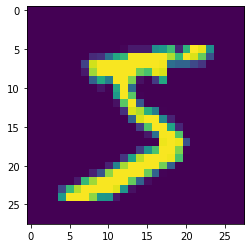

In [2]:
plt.imshow(x_train[0])
print('X_train shape', x_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', x_test.shape)
print('y_test shape', y_test.shape)

In [3]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255


In [5]:
num_classes = 10
y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]

In [6]:
model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(num_classes, activation='softmax')
])

In [7]:
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy', metrics=['accuracy'])
batch_size = 128 
epochs = 20

In [8]:
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 18s 33ms/step - loss: 0.2415 - accuracy: 0.9251 - val_loss: 0.1257 - val_accuracy: 0.9590
Epoch 2/20
469/469 [==============================] - 14s 30ms/step - loss: 0.1024 - accuracy: 0.9695 - val_loss: 0.0860 - val_accuracy: 0.9751
Epoch 3/20
469/469 [==============================] - 14s 30ms/step - loss: 0.0736 - accuracy: 0.9779 - val_loss: 0.0851 - val_accuracy: 0.9745
Epoch 4/20
469/469 [==============================] - 16s 33ms/step - loss: 0.0599 - accuracy: 0.9820 - val_loss: 0.0824 - val_accuracy: 0.9758
Epoch 5/20
469/469 [==============================] - 15s 33ms/step - loss: 0.0493 - accuracy: 0.9850 - val_loss: 0.0786 - val_accuracy: 0.9807
Epoch 6/20
469/469 [==============================] - 23s 49ms/step - loss: 0.0434 - accuracy: 0.9868 - val_loss: 0.0684 - val_accuracy: 0.9825
Epoch 7/20
469/469 [==============================] - 44s 95ms/step - loss: 0.0385 - accuracy: 0.9891 - val_loss: 0.0852 - val_accuracy:

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])